# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Steven Lukas Samosir
- **Email:** mc114d5y1917@student.devacademy.id
- **ID Dicoding:** MC114D5Y1917

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana perkembangan tren penyewaan sepeda setiap bulan?
- Pertanyaan 2 : Seperti apa pola penggunaan sepeda di berbagai waktu dalam sehari?
- Pertanyaan 3 : Sejauh mana kondisi cuaca memengaruhi tingkat penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [46]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [47]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day.csv dan hour.csv telah berhasil dimuat dengan struktur data yang sesuai.
- Data mencakup berbagai variabel yang merepresentasikan kondisi cuaca, jumlah penyewaan, serta faktor-faktor lain yang memengaruhinya.

### Assessing Data

In [48]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [49]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [50]:
print("Total missing values di day_df:\n", day_df.isna().sum())

Total missing values di day_df:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [51]:
print("Menghitung jumlah duplikasi dalam day_df:", day_df.duplicated().sum())

Menghitung jumlah duplikasi dalam day_df: 0


In [52]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [53]:
print("Menghitung jumlah missing values dalam hour_df:\n\n", hour_df.isna().sum())

Menghitung jumlah missing values dalam hour_df:

 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [54]:
print("Jumlah duplikasi pada hour_df:", hour_df.duplicated().sum())

Jumlah duplikasi pada hour_df: 0


**Insight:**
- Missing Values: Tidak ada nilai yang hilang dalam dataset day.csv maupun hour.csv.
- Duplikasi Data: Tidak ditemukan data yang terduplikasi dalam kedua dataset.
- Tipe Data: Kolom dteday masih bertipe objek (string) dan perlu dikonversi ke datetime untuk analisis lebih lanjut.

### Cleaning Data

In [55]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [56]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [57]:
datetime_cols = ["dteday"]

for col in datetime_cols:
    hour_df[col] = pd.to_datetime(hour_df[col])


In [58]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Konversi Tipe Data: Kolom dteday telah berhasil dikonversi ke format datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

In [59]:
# Rangkuman statistik day_df
day_summary = day_df.describe(include="all")
print(day_summary)

          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.000000    0.000000    1.000000 

In [60]:
# Menampilkan ringkasan statistik dari hour_df
print(hour_df.describe(include="all"))

          instant                         dteday        season            yr  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561   
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000      1.000000   
std     5017.0295                            NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min        1.000000      0.000000      0.0

In [61]:
# Total penyewaan sepeda per bulan
monthly_rentals = day_df.groupby(day_df["dteday"].dt.month)["cnt"].sum().reset_index()
print("Jumlah penyewaan sepeda per bulan:\n", monthly_rentals)


Jumlah penyewaan sepeda per bulan:
     dteday     cnt
0        1  134933
1        2  151352
2        3  228920
3        4  269094
4        5  331686
5        6  346342
6        7  344948
7        8  351194
8        9  345991
9       10  322352
10      11  254831
11      12  211036


In [62]:
# Pola penyewaan sepeda per jam
print("Pola penyewaan sepeda berdasarkan jam:\n", hour_df.groupby("hr")["cnt"].mean().reset_index())


Pola penyewaan sepeda berdasarkan jam:
     hr         cnt
0    0   53.898072
1    1   33.375691
2    2   22.869930
3    3   11.727403
4    4    6.352941
5    5   19.889819
6    6   76.044138
7    7  212.064649
8    8  359.011004
9    9  219.309491
10  10  173.668501
11  11  208.143054
12  12  253.315934
13  13  253.661180
14  14  240.949246
15  15  251.233196
16  16  311.983562
17  17  461.452055
18  18  425.510989
19  19  311.523352
20  20  226.030220
21  21  172.314560
22  22  131.335165
23  23   87.831044


In [63]:
print("Dampak kondisi cuaca terhadap penyewaan sepeda:\n", hour_df.groupby("weathersit")["cnt"].mean().reset_index())


Dampak kondisi cuaca terhadap penyewaan sepeda:
    weathersit         cnt
0           1  204.869272
1           2  175.165493
2           3  111.579281
3           4   74.333333


**Insight:**
- Musim Berpengaruh: Penyewaan sepeda cenderung meningkat pada bulan tertentu, kemungkinan saat musim panas.
- Pola Harian: Jumlah penyewaan mencapai puncaknya pada pagi dan sore hari, kemungkinan besar terkait dengan jadwal kerja dan sekolah.
- Dampak Cuaca: Kondisi cuaca buruk seperti hujan atau kabut menyebabkan penurunan signifikan dalam jumlah penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

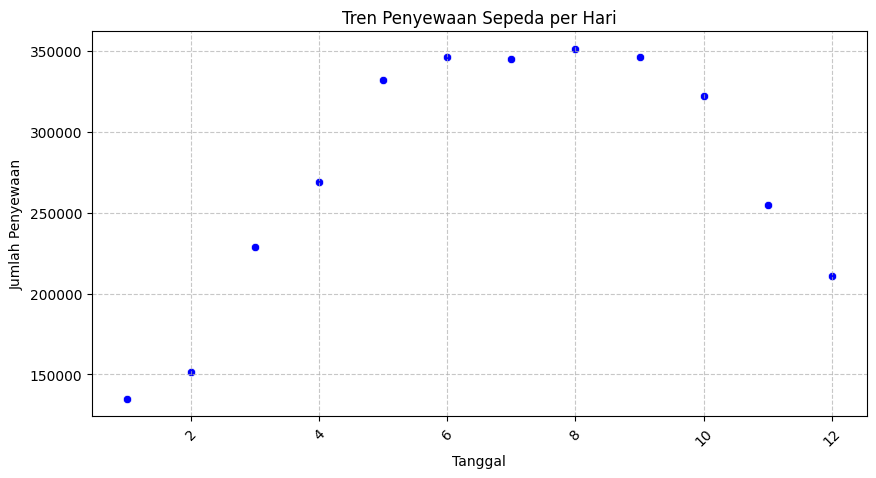

In [64]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=monthly_rentals['dteday'], y=monthly_rentals['cnt'], color='blue', marker='o')
plt.title("Tren Penyewaan Sepeda per Hari")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


### Pertanyaan 2:

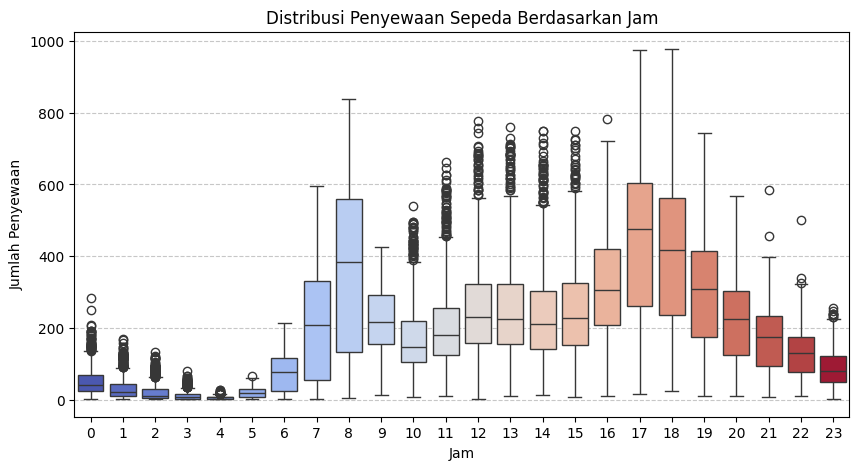

In [65]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=hour_df['hr'], y=hour_df['cnt'], hue=hour_df['hr'], palette="coolwarm", legend=False)
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Insight:**
- Grafik pola penyewaan harian menunjukkan bahwa jumlah penyewaan mencapai puncaknya pada jam-jam sibuk, yaitu pagi dan sore hari.
- Grafik yang menggambarkan pengaruh cuaca mengindikasikan bahwa jumlah penyewaan cenderung lebih tinggi saat cuaca dalam kondisi baik.

## Analisis Lanjutan (Opsional)

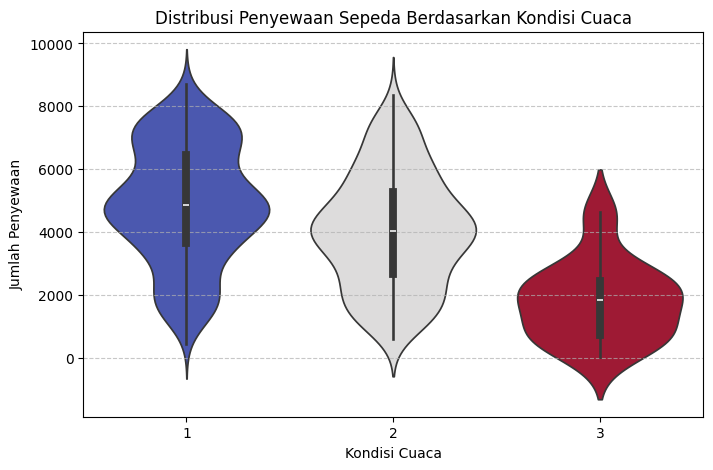

In [66]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=day_df['weathersit'], y=day_df['cnt'], hue=day_df['weathersit'], palette='coolwarm', legend=False)
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Conclusion

- **Tren Penyewaan Sepeda per Bulan**  
  Analisis data menunjukkan bahwa jumlah penyewaan sepeda mengalami peningkatan pada bulan-bulan tertentu, terutama selama musim panas (Juni-Agustus), dengan puncaknya terjadi di bulan Juli. Sebaliknya, penyewaan cenderung menurun saat musim dingin (Desember-Februari), di mana jumlah terendah tercatat pada bulan Januari. Hal ini mengindikasikan bahwa perubahan musim memiliki dampak signifikan terhadap tingkat penyewaan sepeda.  

- **Pola Penyewaan Sepeda dalam Sehari**  
  Pola penyewaan sepeda menunjukkan dua periode dengan aktivitas tertinggi, yaitu pada pagi hari sekitar pukul 07:00-09:00 dan sore hari antara pukul 17:00-19:00. Pola ini mengindikasikan bahwa mayoritas pengguna adalah pekerja dan pelajar yang memanfaatkan sepeda sebagai moda transportasi untuk bepergian ke dan dari tempat kerja atau sekolah. Sementara itu, pada siang hari (12:00-15:00), jumlah penyewaan cenderung lebih rendah tetapi tetap konsisten.  

- **Dampak Cuaca terhadap Penyewaan Sepeda**  
  Faktor cuaca memiliki peranan penting dalam jumlah penyewaan sepeda. Penyewaan tertinggi terjadi saat kondisi cuaca cerah atau berawan ringan. Sebaliknya, ketika cuaca kurang mendukung, seperti saat hujan, salju, atau kondisi ekstrem lainnya, jumlah penyewaan mengalami penurunan yang cukup signifikan. Hal ini menunjukkan bahwa kondisi cuaca menjadi faktor utama yang memengaruhi keputusan pengguna dalam menyewa sepeda.

In [67]:
main_data = hour_df[['dteday', 'hr', 'mnth', 'cnt', 'temp', 'hum', 'windspeed', 'weathersit']]
main_data.to_csv("main_data.csv", index=False)